In [147]:
# Import Dependencies
%matplotlib inline

# Start Python Imports
import math, time, random, datetime
from random import shuffle

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize, MinMaxScaler

# Machine learning
from sklearn.metrics import roc_auc_score
import catboost
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, CatBoostRegressor,cv
import xgboost
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.svm import SVR



# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

In [148]:
df=pd.read_csv('../input/summeranalytics2020/train.csv')
df.shape

(1628, 29)

In [149]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df.head()

,Id,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,30,0,Non-Travel,Research & Development,2,3,Medical,571,3,Female,3,Laboratory Technician,4,Single,2564,0,No,14,3,0,12,2,11,7,6,7,4,1
1,2,36,0,Travel_Rarely,Research & Development,12,4,Life Sciences,1614,3,Female,3,Manufacturing Director,3,Married,4663,9,Yes,12,3,2,7,2,3,2,1,1,2,1
2,3,55,1,Travel_Rarely,Sales,2,1,Medical,842,3,Male,3,Sales Executive,4,Single,5160,4,No,16,3,0,12,3,9,7,7,3,5,1
3,4,39,0,Travel_Rarely,Research & Development,24,1,Life Sciences,2014,1,Male,3,Research Scientist,4,Single,4108,7,No,13,3,0,18,2,7,7,1,7,4,1
4,5,37,0,Travel_Rarely,Research & Development,3,3,Other,689,3,Male,3,Manufacturing Director,3,Married,9434,1,No,15,3,1,10,2,10,7,7,8,1,1


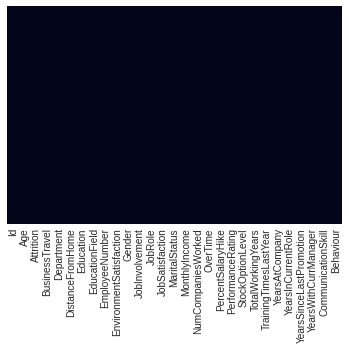

In [150]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

#df.isnull().sum()

In [151]:
test_df=pd.read_csv('../input/summeranalytics2020/test.csv')
print(test_df.shape)

(470, 28)


In [152]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

test_df.head()

,Id,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,28,Travel_Rarely,Research & Development,9,3,Medical,377,4,Male,3,Research Scientist,4,Married,2070,1,No,23,4,1,5,3,5,2,0,4,5,1
1,2,31,Travel_Rarely,Sales,6,4,Medical,653,1,Male,4,Sales Executive,4,Divorced,5460,4,No,22,4,2,13,4,7,7,5,7,3,1
2,3,37,Travel_Rarely,Research & Development,6,3,Medical,474,3,Male,4,Research Scientist,1,Divorced,5974,4,Yes,13,3,2,13,2,7,7,6,7,4,1
3,4,42,Travel_Rarely,Research & Development,1,2,Life Sciences,827,4,Female,2,Manufacturing Director,4,Married,6062,9,Yes,13,3,1,8,4,4,3,0,2,5,1
4,5,45,Non-Travel,Research & Development,4,2,Life Sciences,972,3,Male,3,Laboratory Technician,2,Married,4447,1,No,12,3,0,9,5,9,7,0,8,2,1


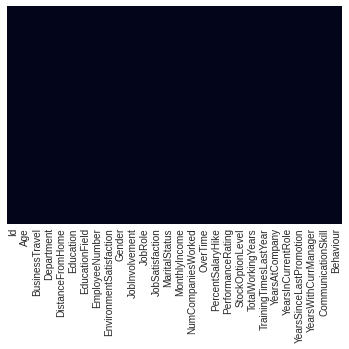

In [153]:
sns.heatmap(test_df.isnull(),yticklabels=False,cbar=False)

In [154]:
### concatenating training and testing dataset horizontally
df_combine=pd.concat([df,test_df],axis=0, sort = False,ignore_index = True)
df_combine.shape

(2098, 29)

In [155]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df_combine.head()

,Id,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,30,0.0,Non-Travel,Research & Development,2,3,Medical,571,3,Female,3,Laboratory Technician,4,Single,2564,0,No,14,3,0,12,2,11,7,6,7,4,1
1,2,36,0.0,Travel_Rarely,Research & Development,12,4,Life Sciences,1614,3,Female,3,Manufacturing Director,3,Married,4663,9,Yes,12,3,2,7,2,3,2,1,1,2,1
2,3,55,1.0,Travel_Rarely,Sales,2,1,Medical,842,3,Male,3,Sales Executive,4,Single,5160,4,No,16,3,0,12,3,9,7,7,3,5,1
3,4,39,0.0,Travel_Rarely,Research & Development,24,1,Life Sciences,2014,1,Male,3,Research Scientist,4,Single,4108,7,No,13,3,0,18,2,7,7,1,7,4,1
4,5,37,0.0,Travel_Rarely,Research & Development,3,3,Other,689,3,Male,3,Manufacturing Director,3,Married,9434,1,No,15,3,1,10,2,10,7,7,8,1,1


# # Separating Nominal and Ordinal Categorial features from the data set

In [156]:
nominal_catg_col = list(df_combine.select_dtypes(['object']).columns)
print(nominal_catg_col)

['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']


In [157]:
ordinal_catg_col = ["Education", "EnvironmentSatisfaction", "JobInvolvement","JobSatisfaction",
                    "PerformanceRating","StockOptionLevel","CommunicationSkill", "Behaviour" ]
print(ordinal_catg_col)

['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'PerformanceRating', 'StockOptionLevel', 'CommunicationSkill', 'Behaviour']


# # Performing One hot coding for Nominal feature

In [158]:
# Since Gender and overtime feature have only 2 labels hence using "drop_first=True".

df_BusinessTravel_one_hot = pd.get_dummies(df_combine['BusinessTravel'], prefix='BusinessTravel')

df_Department_one_hot = pd.get_dummies(df_combine['Department'], prefix='Department')

df_EducationField_one_hot = pd.get_dummies(df_combine['EducationField'], prefix='EducationField')

df_Gender_one_hot = pd.get_dummies(df_combine['Gender'], prefix='Gender',drop_first=True)

df_JobRole_one_hot = pd.get_dummies(df_combine['JobRole'], prefix='JobRole')

df_MaritalStatus_one_hot = pd.get_dummies(df_combine['MaritalStatus'], prefix='MaritalStatus')

df_OverTime_one_hot = pd.get_dummies(df_combine['OverTime'], prefix='OverTime',drop_first=True)

In [159]:
# Combine the one hot encoded columns with df_con_enc
df_nominal_catg = pd.concat([df_BusinessTravel_one_hot, df_Department_one_hot, df_EducationField_one_hot,
                             df_Gender_one_hot, df_JobRole_one_hot, df_MaritalStatus_one_hot,
                             df_OverTime_one_hot], axis=1)

print(df_nominal_catg.shape)
df_nominal_catg.head()

(2098, 26)


,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
2,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
4,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0


In [160]:
## Creating ordinal dataframe

df_ordinal_catg = df_combine[ordinal_catg_col]
print(df_ordinal_catg.shape)
df_ordinal_catg.head()

(2098, 8)


,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,PerformanceRating,StockOptionLevel,CommunicationSkill,Behaviour
0,3,3,3,4,3,0,4,1
1,4,3,3,3,3,2,2,1
2,1,3,3,4,3,0,5,1
3,1,1,3,4,3,0,4,1
4,3,3,3,3,3,1,1,1


In [161]:
final_catg_col = nominal_catg_col + ordinal_catg_col + ["Attrition"]

df_numeric = df_combine.drop( final_catg_col , axis=1)
df_numeric.shape

(2098, 13)

### Scaling numeric features using MinMaxscalar

In [162]:
# As we separated categorical data from the numeric one, now we can do feature scaling

numeric_col = list(df_numeric.columns)

scaler = MinMaxScaler(feature_range=(0, 1))
df_numeric = scaler.fit_transform(df_numeric)
df_numeric = pd.DataFrame(df_numeric, columns= numeric_col)

In [163]:
print(df_numeric.shape)
df_numeric.head()

(2098, 13)


,Id,Age,DistanceFromHome,EmployeeNumber,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.000000,0.285714,0.035714,0.275762,0.081885,0.000000,0.214286,0.300,0.333333,0.275,0.388889,0.400000,0.411765
1,0.000615,0.428571,0.392857,0.780358,0.192417,1.000000,0.071429,0.175,0.333333,0.075,0.111111,0.066667,0.058824
2,0.001229,0.880952,0.035714,0.406870,0.218589,0.444444,0.357143,0.300,0.500000,0.225,0.388889,0.466667,0.176471
3,0.001844,0.500000,0.821429,0.973875,0.163191,0.777778,0.142857,0.450,0.333333,0.175,0.388889,0.066667,0.411765
4,0.002459,0.452381,0.071429,0.332850,0.443655,0.111111,0.285714,0.250,0.333333,0.250,0.388889,0.466667,0.470588


### Time to concatenate all features

In [164]:
print(df_numeric.shape)
print(df_ordinal_catg.shape)
print(df_nominal_catg.shape)

(2098, 13)
(2098, 8)
(2098, 26)


In [165]:
df_pre_process = pd.concat([df_numeric, df_ordinal_catg.reset_index(drop=True),
                           df_nominal_catg.reset_index(drop=True)],axis=1,sort = False)

print(df_pre_process.shape)
df_pre_process.head()

(2098, 47)


,Id,Age,DistanceFromHome,EmployeeNumber,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,PerformanceRating,StockOptionLevel,CommunicationSkill,Behaviour,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0.000000,0.285714,0.035714,0.275762,0.081885,0.000000,0.214286,0.300,0.333333,0.275,0.388889,0.400000,0.411765,3,3,3,4,3,0,4,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,0.000615,0.428571,0.392857,0.780358,0.192417,1.000000,0.071429,0.175,0.333333,0.075,0.111111,0.066667,0.058824,4,3,3,3,3,2,2,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
2,0.001229,0.880952,0.035714,0.406870,0.218589,0.444444,0.357143,0.300,0.500000,0.225,0.388889,0.466667,0.176471,1,3,3,4,3,0,5,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0.001844,0.500000,0.821429,0.973875,0.163191,0.777778,0.142857,0.450,0.333333,0.175,0.388889,0.066667,0.411765,1,1,3,4,3,0,4,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
4,0.002459,0.452381,0.071429,0.332850,0.443655,0.111111,0.285714,0.250,0.333333,0.250,0.388889,0.466667,0.470588,3,3,3,3,3,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0


In [166]:
X_train_pre = df_pre_process.iloc[:1628,:]
X_test_pre = df_pre_process.iloc[1628:,:]
y_train = df['Attrition']

print(X_train_pre.shape)
print(y_train.shape)
print(X_test_pre.shape)

(1628, 47)
(1628,)
(470, 47)


### DATA BINNING

In [167]:
def feat_to_binning(str, bin):

    df_bin = pd.DataFrame()
    df_bin[str] = df_combine[str]

    fig, ax = plt.subplots()
    df_bin[str].hist(bins = bin, color='#A9C5D3', edgecolor='black',  
                              grid=False)
    #ax.set_title('Whole dataset {} Histogram'.format{str}, fontsize=12)
    ax.set_xlabel(str, fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)
    
    df_bin[str + '_bin_round'] = np.array(np.int64(
                              np.array(df_bin[str]) / 10.))
    return df_bin


3    846
2    525
4    453
5    228
1     41
6      5
Name: Age_bin_round, dtype: int64


,Age,Age_bin_round
0,30,3
1,36,3
2,55,5
3,39,3
4,37,3


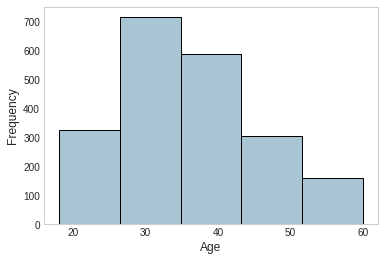

In [168]:
df_age = feat_to_binning("Age",5)

print(df_age['Age_bin_round'].value_counts())

df_age.head()

### Converting Age to Binning form

In [169]:
X_train_pre['Age'] = df_age.loc[:1628,'Age_bin_round']
X_test_pre['Age'] = df_age.loc[1628:,'Age_bin_round']


### Visualization of our datset

In [170]:
df.describe()

,Id,Age,Attrition,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
count,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.0
mean,814.500000,35.645577,0.482187,9.735258,2.884521,1000.985872,2.646192,2.650491,2.639435,5785.524570,2.761671,15.207617,3.155405,0.692260,9.949017,2.752457,6.092752,3.614865,2.049140,3.551597,3.135749,1.0
std,470.107435,9.481794,0.499836,8.306546,1.020470,585.417694,1.125283,0.736330,1.096272,4339.293147,2.549995,3.686703,0.362402,0.864808,7.482936,1.288033,5.921168,3.481051,3.138287,3.494369,1.408770,0.0
min,1.000000,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,11.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
25%,407.750000,29.000000,0.000000,2.000000,2.000000,509.250000,2.000000,2.000000,2.000000,2625.000000,1.000000,12.000000,3.000000,0.000000,5.000000,2.000000,2.000000,1.000000,0.000000,0.000000,2.000000,1.0
50%,814.500000,34.000000,0.000000,8.000000,3.000000,977.000000,3.000000,3.000000,3.000000,4304.000000,2.000000,14.000000,3.000000,0.000000,8.000000,3.000000,5.000000,2.000000,1.000000,2.000000,3.000000,1.0
75%,1221.250000,42.000000,1.000000,15.000000,4.000000,1494.000000,4.000000,3.000000,4.000000,7124.250000,4.000000,18.000000,3.000000,1.000000,13.000000,3.000000,8.000000,7.000000,2.000000,7.000000,4.000000,1.0
max,1628.000000,60.000000,1.000000,29.000000,5.000000,2068.000000,4.000000,4.000000,4.000000,19999.000000,9.000000,25.000000,4.000000,3.000000,38.000000,6.000000,37.000000,18.000000,15.000000,17.000000,5.000000,1.0


In [171]:
X_train_pre.describe()

,Id,Age,DistanceFromHome,EmployeeNumber,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,PerformanceRating,StockOptionLevel,CommunicationSkill,Behaviour,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
count,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.0,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000
mean,0.500000,3.121007,0.311973,0.483786,0.251528,0.306852,0.300544,0.248725,0.458743,0.152319,0.200826,0.136609,0.208917,2.884521,2.646192,2.650491,2.639435,3.155405,0.692260,3.135749,1.0,0.073710,0.247543,0.678747,0.049754,0.601351,0.348894,0.024570,0.382678,0.121007,0.320025,0.052211,0.099509,0.611794,0.067568,0.044226,0.190418,0.055283,0.074324,0.028870,0.209459,0.224201,0.105651,0.194717,0.418305,0.386978,0.385749
std,0.288941,0.995738,0.296662,0.283221,0.228504,0.283333,0.263336,0.187073,0.214672,0.148029,0.193392,0.209219,0.205551,1.020470,1.125283,0.736330,1.096272,0.362402,0.864808,1.408770,0.0,0.261379,0.431717,0.467101,0.217504,0.489771,0.476767,0.154858,0.486190,0.326236,0.466629,0.222521,0.299436,0.487492,0.251079,0.205660,0.392751,0.228601,0.262379,0.167492,0.407048,0.417184,0.307485,0.396105,0.493432,0.487208,0.486921
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000,0.000000,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,2.000000,0.035714,0.245888,0.085097,0.111111,0.071429,0.125000,0.333333,0.050000,0.055556,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,3.000000,0.000000,2.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,3.000000,0.250000,0.472182,0.173512,0.222222,0.214286,0.200000,0.500000,0.125000,0.111111,0.066667,0.117647,3.000000,3.000000,3.000000,3.000000,3.000000,0.000000,3.000000,1.0,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.750000,4.000000,0.500000,0.722303,0.322025,0.444444,0.500000,0.325000,0.500000,0.200000,0.388889,0.133333,0.411765,4.000000,4.000000,3.000000,4.000000,3.000000,1.000000,4.000000,1.0,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

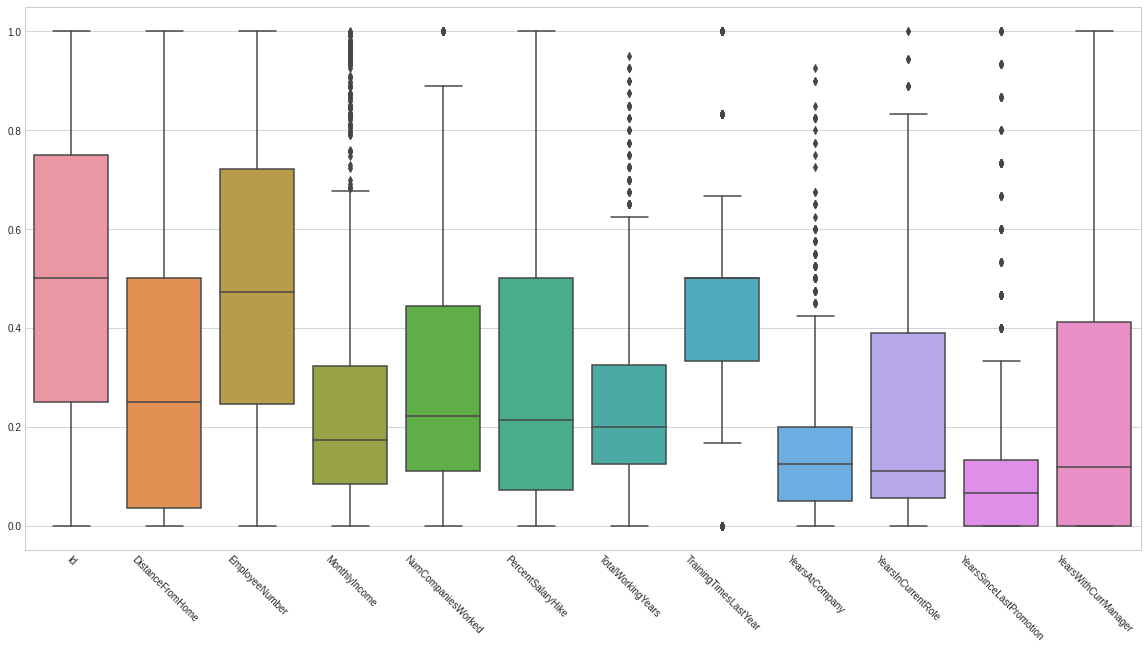

In [172]:
num_col = numeric_col
num_col.remove('Age')

plt.figure(figsize=(20,10))
sns.boxplot(data= X_train_pre.loc[:,num_col])

# Rotate x-labels
plt.xticks(rotation=-45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

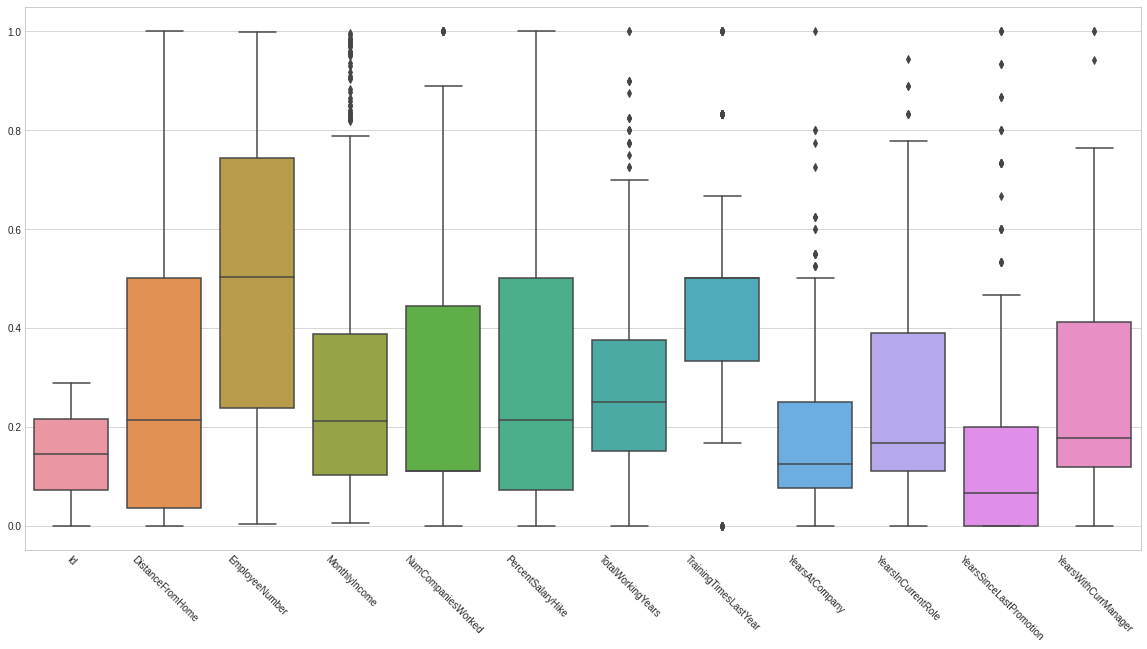

In [173]:
plt.figure(figsize=(20,10))
sns.boxplot(data= X_test_pre.loc[:,num_col])

# Rotate x-labels
plt.xticks(rotation=-45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

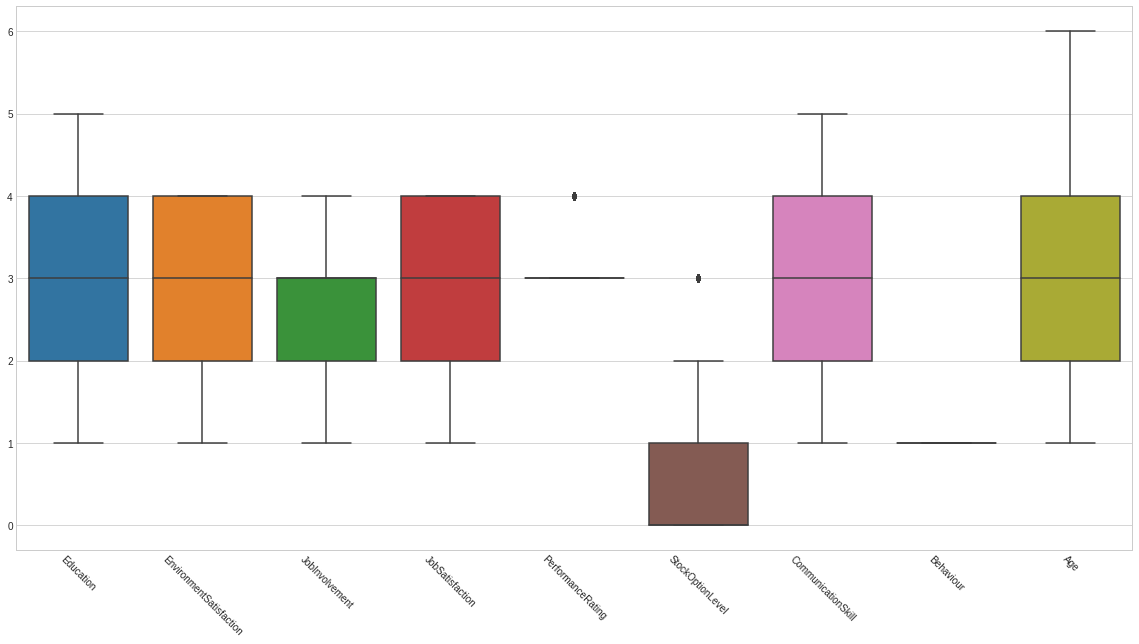

In [174]:
ord_col = ordinal_catg_col + ['Age']

plt.figure(figsize=(20,10))
sns.boxplot(data= X_train_pre.loc[:,ord_col])

# Rotate x-labels
plt.xticks(rotation=-45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

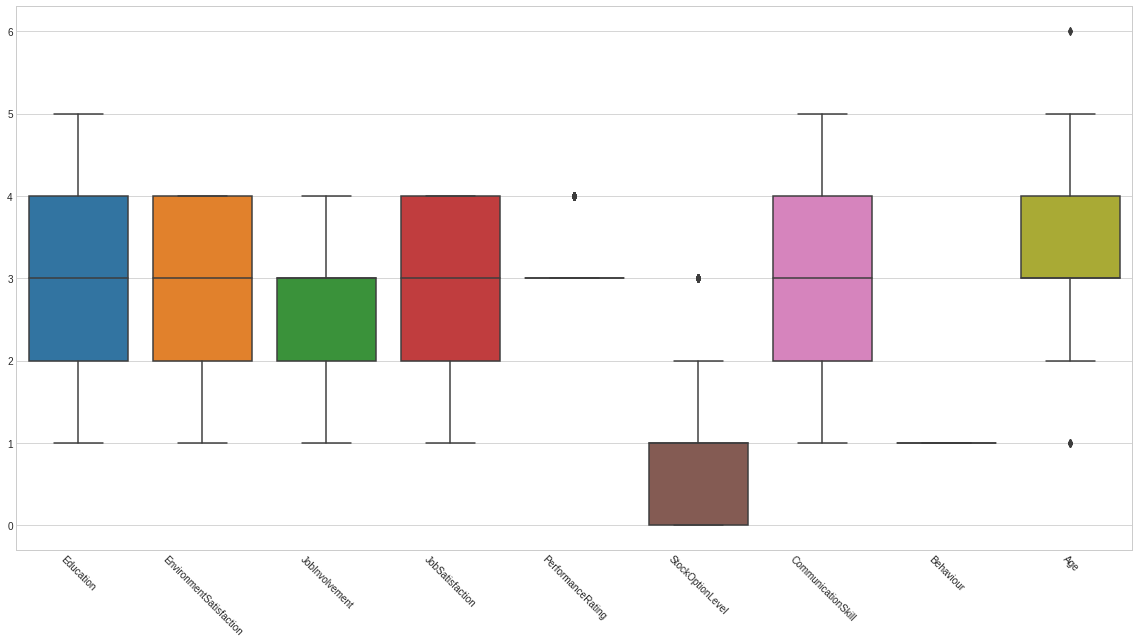

In [175]:
plt.figure(figsize=(20,10))
sns.boxplot(data= X_test_pre.loc[:,ord_col])

# Rotate x-labels
plt.xticks(rotation=-45)

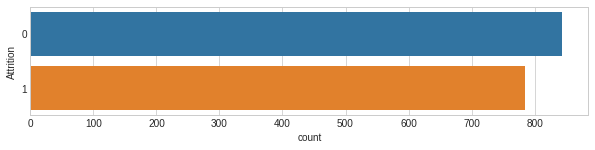

In [176]:
# Let's view the distribution of Attrition
plt.figure(figsize=(10, 2))
sns.countplot(y="Attrition", data=df);

In [177]:
def plot_count_dist(data, bin_df, label_column, target_column, figsize=(20, 5), use_bin_df=False):
    """
    Function to plot counts and distributions of a label variable and 
    target variable side by side.
    ::param_data:: = target dataframe
    ::param_bin_df:: = binned dataframe for countplot
    ::param_label_column:: = binary labelled column
    ::param_target_column:: = column you want to view counts and distributions
    ::param_figsize:: = size of figure (width, height)
    ::param_use_bin_df:: = whether or not to use the bin_df, default False
    """
    if use_bin_df: 
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)                                      # 1 row, 2 col., 1 imamge
        sns.countplot(y=target_column, data=bin_df);         # here data is not the args one, its inbuilt countplot arg.
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Attrition-1"});
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "Attrition-0"});
    else:
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=data);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Attrition-1"});
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "Attrition-0"});

In [178]:
df_bin = pd.DataFrame() # for discretised continuous variables
df_con = pd.DataFrame() # for continuous variables

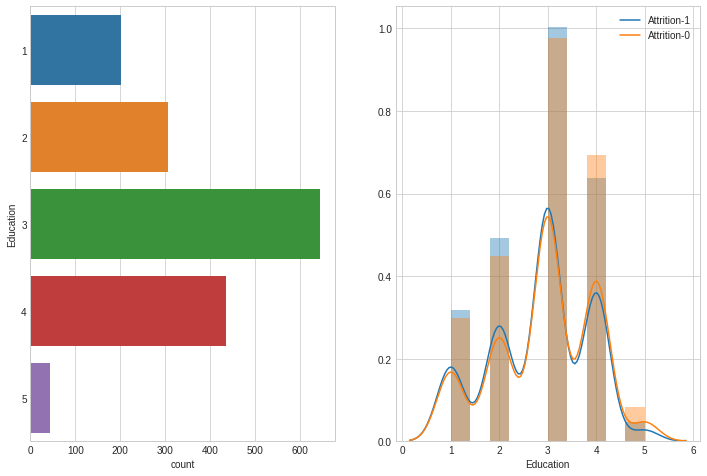

In [179]:
# Add Education to subset dataframes
df_bin['Education'] = df['Education']

# Visualise the counts of Education and the distribution of the values against Attrition class 
plot_count_dist(df, 
                bin_df=df_bin, 
                label_column='Attrition', 
                target_column='Education', 
                figsize=(12, 8))


## Univariate method

In [180]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,f_classif

X = X_train_pre.iloc[:,:21]
y= y_train

print(X.shape)
print(y.shape)

(1628, 21)
(1628,)


### using chi-square test

In [181]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=21)
fit = bestfeatures.fit(X,y)

In [182]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [183]:
featureScores                # higher is the score, more important the feature is 

,Specs,Score
0,Id,1.311608e+02
1,Age,1.657079e+01
2,DistanceFromHome,5.475543e+00
3,EmployeeNumber,7.158174e-01
4,MonthlyIncome,1.953185e+01
5,NumCompaniesWorked,5.143683e-01
6,PercentSalaryHike,6.023968e-02
7,TotalWorkingYears,1.582506e+01
8,TrainingTimesLastYear,1.824794e+00
9,YearsAtCompany,1.238838e+01


In [184]:
print(featureScores.nlargest(21,'Score'))  

                      Specs         Score
0                        Id  1.311608e+02
18         StockOptionLevel  5.413648e+01
10       YearsInCurrentRole  2.199200e+01
4             MonthlyIncome  1.953185e+01
1                       Age  1.657079e+01
12     YearsWithCurrManager  1.632665e+01
16          JobSatisfaction  1.622957e+01
7         TotalWorkingYears  1.582506e+01
9            YearsAtCompany  1.238838e+01
19       CommunicationSkill  1.100496e+01
14  EnvironmentSatisfaction  9.721901e+00
15           JobInvolvement  8.489289e+00
2          DistanceFromHome  5.475543e+00
8     TrainingTimesLastYear  1.824794e+00
11  YearsSinceLastPromotion  1.323143e+00
13                Education  1.006257e+00
3            EmployeeNumber  7.158174e-01
5        NumCompaniesWorked  5.143683e-01
6         PercentSalaryHike  6.023968e-02
17        PerformanceRating  7.048531e-03
20                Behaviour  1.533179e-29


### using ANOVA F-value between label/feature for classification tasks.

In [185]:
#apply SelectKBest class to extract top 10 best features
bestfeatures_f = SelectKBest(score_func=f_classif, k=39)
fit_f = bestfeatures.fit(X,y)

In [186]:
dfscores_f = pd.DataFrame(fit_f.scores_)
dfcolumns_f = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores_f = pd.concat([dfcolumns_f,dfscores_f],axis=1)
featureScores_f.columns = ['Specs','Score']  #naming the dataframe columns

In [187]:
print(featureScores_f.nlargest(39,'Score')) 

                      Specs         Score
0                        Id  1.311608e+02
18         StockOptionLevel  5.413648e+01
10       YearsInCurrentRole  2.199200e+01
4             MonthlyIncome  1.953185e+01
1                       Age  1.657079e+01
12     YearsWithCurrManager  1.632665e+01
16          JobSatisfaction  1.622957e+01
7         TotalWorkingYears  1.582506e+01
9            YearsAtCompany  1.238838e+01
19       CommunicationSkill  1.100496e+01
14  EnvironmentSatisfaction  9.721901e+00
15           JobInvolvement  8.489289e+00
2          DistanceFromHome  5.475543e+00
8     TrainingTimesLastYear  1.824794e+00
11  YearsSinceLastPromotion  1.323143e+00
13                Education  1.006257e+00
3            EmployeeNumber  7.158174e-01
5        NumCompaniesWorked  5.143683e-01
6         PercentSalaryHike  6.023968e-02
17        PerformanceRating  7.048531e-03
20                Behaviour  1.533179e-29


## Feature Importance

In [188]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
#model = ExtraTreesClassifier()
#model = xgboost.XGBClassifier()

X_imp = X_train_pre
y_imp = y_train

model = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0, gamma=0.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.03, max_delta_step=0, max_depth=100,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=500, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)
model.fit(X_imp,y_imp)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0, gamma=0.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.03, max_delta_step=0, max_depth=100,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=500, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [189]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.2702922  0.01808885 0.01933951 0.01433469 0.02251707 0.0146507
 0.01479592 0.02163737 0.01577598 0.02116806 0.01734904 0.01537646
 0.01784729 0.01135397 0.01999325 0.01845493 0.01741783 0.
 0.0275424  0.01496753 0.         0.00844091 0.02346701 0.02042703
 0.01719035 0.01925546 0.01581118 0.01221152 0.01438539 0.02164471
 0.01292192 0.01168447 0.01848688 0.01145437 0.00853439 0.00924171
 0.01348315 0.00877969 0.01152489 0.         0.01914965 0.01778826
 0.02306382 0.01138161 0.01343134 0.02448579 0.03885154]


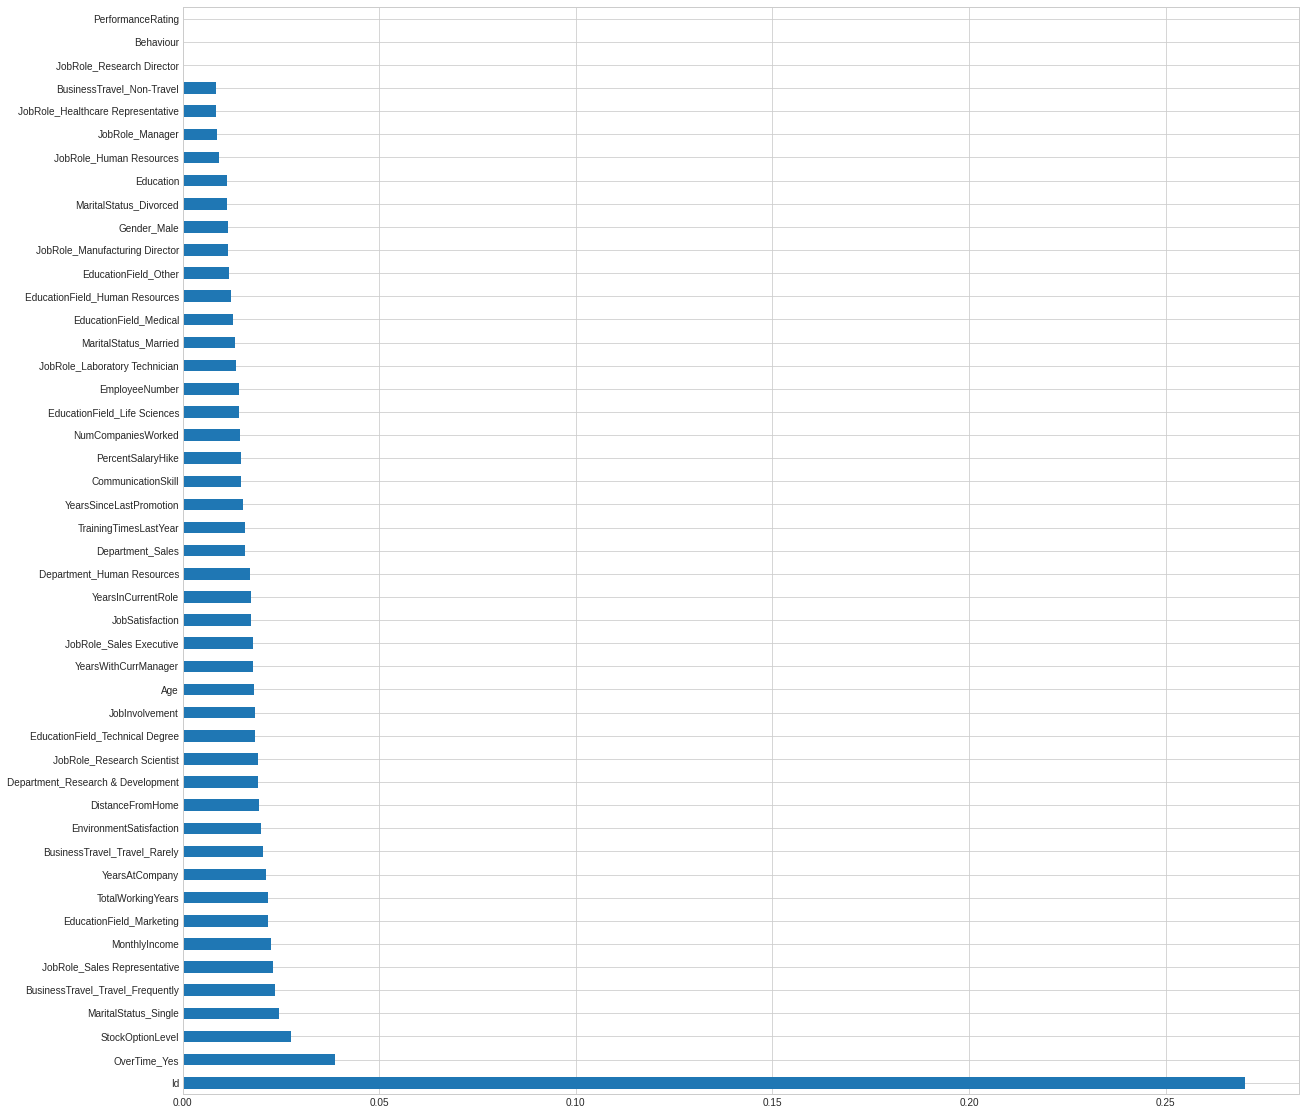

In [190]:
#plot graph of feature importances for better visualization
plt.figure(figsize=(20,20))

feat_importances = pd.Series(model.feature_importances_, index=X_imp.columns)
feat_importances.nlargest(X_imp.shape[1]).plot(kind='barh')
plt.show()

### CORRELATION MATRIX

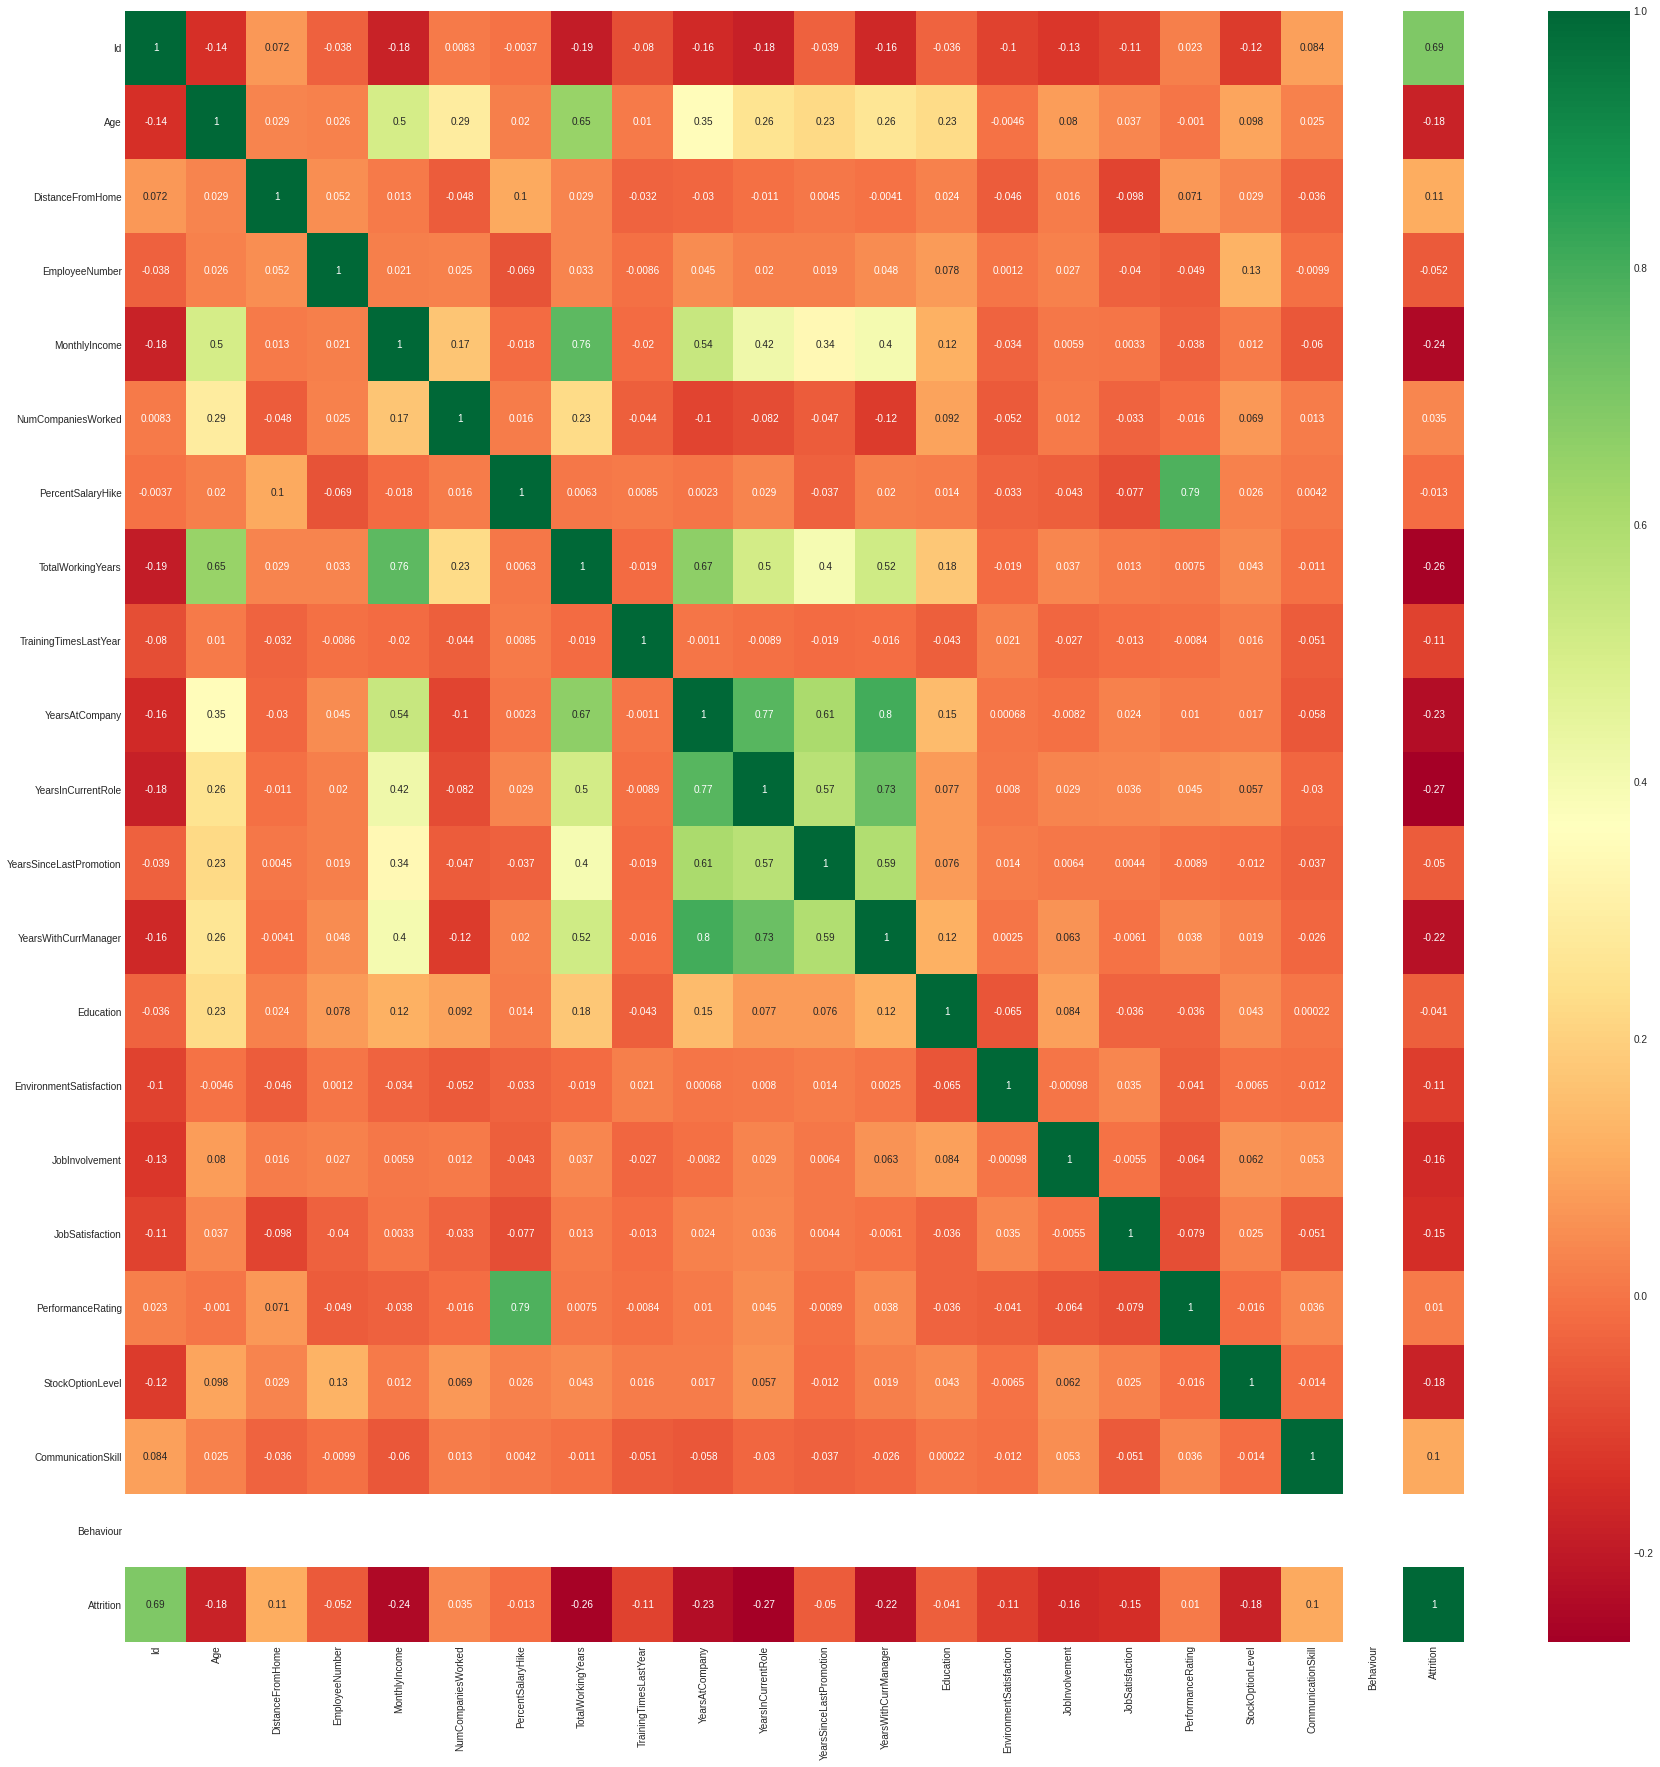

In [191]:
import seaborn as sns

attr = y
df_corr = pd.concat([X, y], axis =1 )

corrmat = df_corr.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(30,30))
#plot heat map
g=sns.heatmap(df_corr[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## Pearson Correlation among Nominal categorical feature

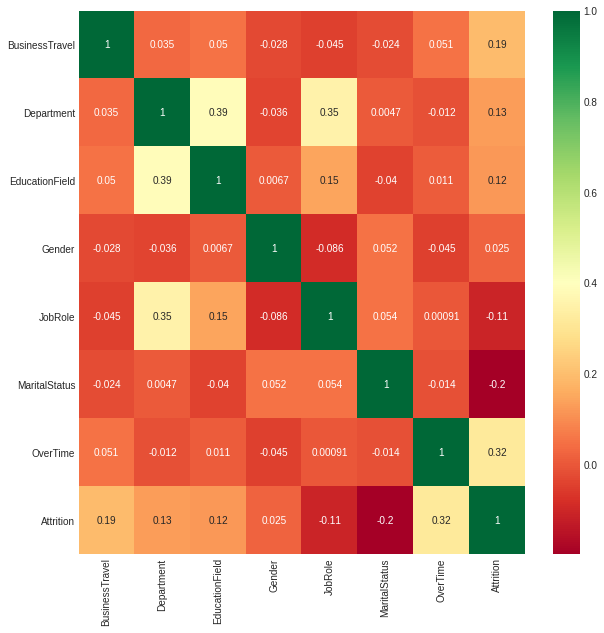

In [192]:
pearson_corr_col = nominal_catg_col + ['Attrition']

df_corr =df[pearson_corr_col]
corrmat = df[pearson_corr_col].apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)

top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(corrmat,annot=True,cmap="RdYlGn")

### After analyzing all the feature selection methods we will drop some features

In [ ]:
X_train = X_train_pre.drop(['Id','Behaviour','PerformanceRating',  'PercentSalaryHike',
                            'YearsAtCompany','TotalWorkingYears', 'EmployeeNumber', 
                            'YearsSinceLastPromotion'], axis=1)
X_test = X_test_pre.drop(['Id','Behaviour','PerformanceRating',  'PercentSalaryHike',
                          'YearsAtCompany','TotalWorkingYears', 'EmployeeNumber', 
                          'YearsSinceLastPromotion'], axis=1)

print(X_train.shape)
print(X_test.shape)

## Catboost Classifier

In [121]:

X_train_pre_cat = df_combine.iloc[:1628,:]
X_train_pre_cat = X_train_pre_cat.drop(['Attrition'], axis =1 )


X_test_pre_cat = df_combine.iloc[1628:,:]
X_test_pre_cat = X_test_pre_cat.drop(['Attrition'], axis =1 )

X_train_pre_cat['Age'] = df_age.loc[:1628,'Age_bin_round']
X_test_pre_cat['Age'] = df_age.loc[1628:,'Age_bin_round']


print(X_train_pre_cat.shape)
print(X_test_pre_cat.shape)

(1628, 28)
(470, 28)


In [122]:

X_train_cat = X_train_pre_cat.drop(['Id','Behaviour','PerformanceRating',  'PercentSalaryHike',
                            'YearsAtCompany','TotalWorkingYears', 'EmployeeNumber', 
                            'YearsSinceLastPromotion'], axis=1)
X_test_cat = X_test_pre_cat.drop(['Id','Behaviour','PerformanceRating',  'PercentSalaryHike',
                          'YearsAtCompany','TotalWorkingYears', 'EmployeeNumber', 
                          'YearsSinceLastPromotion'], axis=1)

print(X_train_cat.shape)
print(X_test_cat.shape)


(1628, 20)
(470, 20)


In [123]:
all_catg_col = ['Age'] + ordinal_catg_col + nominal_catg_col 

indices_cat = []
for col in all_catg_col:
    if (col in list(X_train_cat.columns)):
        indices_cat.append(X_train_cat.columns.get_loc(col))

indices_cat.sort()
print(indices_cat)

train_pool_cat = Pool(X_train_cat, 
                  y_train,
                  indices_cat)

[0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 14, 15, 19]


In [ ]:
### RANDOMIZED SEARCH

model_cat = CatBoostClassifier(random_state = 51,eval_metric = 'AUC')

random_grid_cat = {'learning_rate': [0.05, 0.08, 0.1, 0.15, 0.2, 0.3],
        'depth': [4, 6,10,15,20,30,40,50,60,70],
        'l2_leaf_reg': [1, 3, 5, 7, 9]}

randomized_search_cat = model_cat.randomized_search(random_grid_cat, train_pool_cat, cv=5,plot=True)
                    

In [ ]:
randomized_search_cat

In [131]:

#model_train = CatBoostClassifier(iterations=100, depth =10, learning_rate=0.1, random_state = 51,
#                                 loss_function ='CrossEntropy', custom_loss = ['Accuracy'], eval_metrics = 'AUC')                              

# best one
model_train = CatBoostClassifier(iterations=170, learning_rate=0.1, random_state = 51,eval_metric = 'AUC',loss_function ='CrossEntropy')                              

model_train.fit(train_pool_cat) #, plot=True)

# CatBoost accuracy
acc_catboost = round(model_train.score(X_train_cat, y_train) * 100, 2)

0:	total: 4.67ms	remaining: 789ms
1:	total: 8.55ms	remaining: 718ms
2:	total: 12.6ms	remaining: 704ms
3:	total: 16.4ms	remaining: 679ms
4:	total: 20.1ms	remaining: 664ms
5:	total: 23.6ms	remaining: 646ms
6:	total: 27.5ms	remaining: 640ms
7:	total: 31.3ms	remaining: 634ms
8:	total: 35.5ms	remaining: 634ms
9:	total: 39.4ms	remaining: 630ms
10:	total: 43.5ms	remaining: 629ms
11:	total: 47.3ms	remaining: 622ms
12:	total: 51.1ms	remaining: 617ms
13:	total: 54.9ms	remaining: 612ms
14:	total: 58.7ms	remaining: 607ms
15:	total: 62.6ms	remaining: 603ms
16:	total: 66.4ms	remaining: 598ms
17:	total: 70.1ms	remaining: 592ms
18:	total: 73.9ms	remaining: 587ms
19:	total: 77.9ms	remaining: 584ms
20:	total: 81.3ms	remaining: 577ms
21:	total: 88.3ms	remaining: 594ms
22:	total: 94.6ms	remaining: 605ms
23:	total: 99.3ms	remaining: 604ms
24:	total: 104ms	remaining: 605ms
25:	total: 109ms	remaining: 603ms
26:	total: 113ms	remaining: 600ms
27:	total: 117ms	remaining: 593ms
28:	total: 121ms	remaining: 588ms


In [132]:
# Set params for cross-validation as same as initial model
cv_params = model_train.get_params()

# Run the cross-validation for 10-folds (same as the other models)
cv_data = cv(train_pool_cat,
             cv_params,
             fold_count=5,
             plot=True)


# CatBoost CV results save into a dataframe (cv_data), let's withdraw the maximum accuracy score
acc_cv_catboost = round(np.max(cv_data['test-AUC-mean']) * 100, 2)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.7733717	best: 0.7733717 (0)	total: 206ms	remaining: 34.8s
1:	test: 0.8109732	best: 0.8109732 (1)	total: 359ms	remaining: 30.2s
2:	test: 0.8299886	best: 0.8299886 (2)	total: 522ms	remaining: 29s
3:	test: 0.8391708	best: 0.8391708 (3)	total: 683ms	remaining: 28.4s
4:	test: 0.8483214	best: 0.8483214 (4)	total: 865ms	remaining: 28.5s
5:	test: 0.8558999	best: 0.8558999 (5)	total: 1.03s	remaining: 28.1s
6:	test: 0.8624811	best: 0.8624811 (6)	total: 1.24s	remaining: 28.9s
7:	test: 0.8673572	best: 0.8673572 (7)	total: 1.42s	remaining: 28.8s
8:	test: 0.8720497	best: 0.8720497 (8)	total: 1.6s	remaining: 28.6s
9:	test: 0.8737196	best: 0.8737196 (9)	total: 1.77s	remaining: 28.3s
10:	test: 0.8781920	best: 0.8781920 (10)	total: 1.95s	remaining: 28.2s
11:	test: 0.8850559	best: 0.8850559 (11)	total: 2.14s	remaining: 28.1s
12:	test: 0.8868190	best: 0.8868190 (12)	total: 2.33s	remaining: 28.1s
13:	test: 0.8881126	best: 0.8881126 (13)	total: 2.5s	remaining: 27.8s
14:	test: 0.8938815	best: 0.89

116:	test: 0.9867703	best: 0.9867703 (116)	total: 21.5s	remaining: 9.75s
117:	test: 0.9869740	best: 0.9869740 (117)	total: 21.7s	remaining: 9.56s
118:	test: 0.9872762	best: 0.9872762 (118)	total: 21.9s	remaining: 9.37s
119:	test: 0.9871333	best: 0.9872762 (118)	total: 22s	remaining: 9.18s
120:	test: 0.9871710	best: 0.9872762 (118)	total: 22.2s	remaining: 9s
121:	test: 0.9875410	best: 0.9875410 (121)	total: 22.4s	remaining: 8.81s
122:	test: 0.9875561	best: 0.9875561 (122)	total: 22.6s	remaining: 8.63s
123:	test: 0.9876402	best: 0.9876402 (123)	total: 22.8s	remaining: 8.44s
124:	test: 0.9877530	best: 0.9877530 (124)	total: 22.9s	remaining: 8.26s
125:	test: 0.9880558	best: 0.9880558 (125)	total: 23.1s	remaining: 8.07s
126:	test: 0.9880787	best: 0.9880787 (126)	total: 23.3s	remaining: 7.88s
127:	test: 0.9884653	best: 0.9884653 (127)	total: 23.5s	remaining: 7.7s
128:	test: 0.9887378	best: 0.9887378 (128)	total: 23.7s	remaining: 7.53s
129:	test: 0.9888673	best: 0.9888673 (129)	total: 23.9s	r

In [133]:
print('train accuracy: ' , acc_catboost)
print("CV Accuracy: " ,acc_cv_catboost)

cv_data.head()

train accuracy:  100.0
CV Accuracy:  99.25


,iterations,test-AUC-mean,test-AUC-std,test-CrossEntropy-mean,test-CrossEntropy-std,train-CrossEntropy-mean,train-CrossEntropy-std
0,0,0.773372,0.028138,0.661976,0.004967,0.658878,0.003951
1,1,0.810973,0.021595,0.635166,0.007849,0.629530,0.007195
2,2,0.829989,0.023996,0.610601,0.012589,0.603873,0.010019
3,3,0.839171,0.026764,0.590372,0.013424,0.579935,0.011196
4,4,0.848321,0.030238,0.570152,0.017146,0.557127,0.009812


In [135]:
y_pred=model_train.predict_proba(X_test_cat)

pred=pd.DataFrame(y_pred[:,1])
sub_df=pd.read_csv('../input/summeranalytics2020/Sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','Attrition']
datasets.to_csv('Catboost_submission_temp.csv',index=False)

### XBG classifier

In [139]:
xbg_classifier = xgboost.XGBClassifier(scoring = 'roc_auc', random_state = 51)

booster=['gbtree']    

## Hyper Parameter Optimization

hyperparameter_grid = {
        'n_estimators' : [100, 500, 900, 1100, 1500],      # no. of decision trees used
        'min_child_weight': [1, 2, 3, 5, 7, 9],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120],
        'learning_rate' : [0.005,0.01,0.03, 0.05, 0.15,0.3, 0.45, 0.55]
        }

# Set up the random search with 4-fold cross validation
folds = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 51)

random_cv = RandomizedSearchCV(estimator=xbg_classifier,
            param_distributions=hyperparameter_grid,
            cv=skf.split(X_train,y_train), n_iter=50,
            scoring = 'roc_auc',n_jobs = 4,
            verbose = 5, 
            return_train_score = True)

In [140]:
random_cv.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   18.7s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  1.3min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  3.0min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:  4.2min finished


[21:22:02] WARNING: /workspace/src/learner.cc:480: 
Parameters: { scoring } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x7fb9041766d0>,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing...
                   n_iter=50, n_jobs=4,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.5, 1, 1.5, 2, 5],
                                        'learning_rate': [0.005, 0.01, 0.03,
 

In [141]:
classifier_t = random_cv.best_estimator_
print(classifier_t)
classifier_t.fit(X_train,y_train)     

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=90,
              min_child_weight=2, missing=nan, monotone_constraints='()',
              n_estimators=900, n_jobs=0, num_parallel_tree=1, random_state=51,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, scoring='roc_auc',
              subsample=1.0, tree_method='exact', validate_parameters=1,
              verbosity=None)
[21:24:29] WARNING: /workspace/src/learner.cc:480: 
Parameters: { scoring } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=90,
              min_child_weight=2, missing=nan, monotone_constraints='()',
              n_estimators=900, n_jobs=0, num_parallel_tree=1, random_state=51,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, scoring='roc_auc',
              subsample=1.0, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [142]:

acc_xgb = round(classifier_t.score(X_train, y_train) * 100, 2)

from sklearn import model_selection, tree, preprocessing, metrics, linear_model

train_pred = model_selection.cross_val_predict(classifier_t, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=5, 
                                                  n_jobs = -1)


# Cross-validation accuracy metric
acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)

print(acc_xgb)
print(acc_cv)

100.0
95.76


In [144]:
y_pred=classifier_t.predict_proba(X_test)

pred=pd.DataFrame(y_pred[:,1])
sub_df=pd.read_csv('../input/summeranalytics2020/Sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','Attrition']
datasets.to_csv('XBGC_random_submission_temp.csv',index=False)

## Result

1. Using Catboost Classifer, I got a maximum score of 0.86377 in the public leaderboard but it changes drastically in the private leaderboard to 0.78190.
2. Using XBG Classifier, I got a maximum score of 0.85863 in the public leaderboard whereas in the private leaderboard it comes to be 0.81921.
